In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.ticker as ticker
import glob
from scipy.optimize import curve_fit


In [2]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/*.jpg')])
print(imgs.shape)

(96, 1920, 1080)


In [3]:
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)

(96, 1080)


In [4]:
# for rows in avg_rows:
#     plt.plot(rows)
#     plt.show()

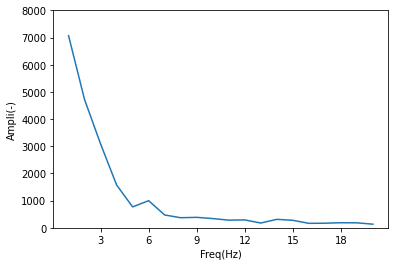

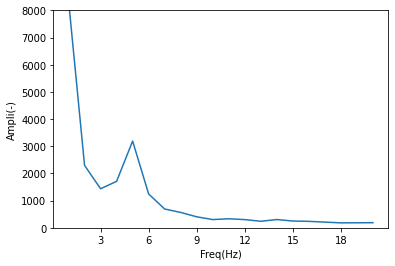

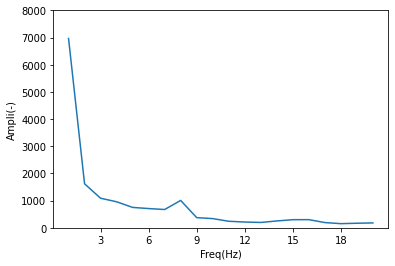

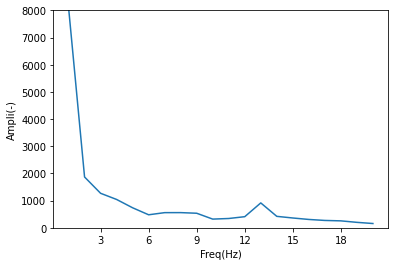

In [7]:
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
x = np.arange(1, 21)
# for specs in specs_all:
#     specs = specs[1:21]
#     plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
#     plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
#     plt.plot(x,specs)
#     plt.xlabel("Freq(Hz)")
#     plt.ylabel("Ampli(-)")
#     plt.ylim([0,8000])
#     plt.show()
for i in range(4):
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,np.mean(specs_all[i*24:i*24+24], axis=0)[1:21])
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,8000])
    # for specs in specs_all[i*24:i*24+24]:
    #     specs = specs[1:21]
    #     plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    #     plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    #     plt.plot(x,specs)
    #     plt.xlabel("Freq(Hz)")
    #     plt.ylabel("Ampli(-)")
    #     plt.ylim([0,8000])
    plt.show()


In [13]:
measure_positions = [
    [2.00, 1.75], [2.0, 1.25], [1.5, 1.25],
    [1.5, 1.75], [1.0, 1.75], [1.0, 1.25]
]
led_positions = [2.0, 1.0]
distances = [np.sqrt(np.square(measure[0] - led_positions[0]) +
                     np.square(measure[1] - led_positions[1])) for measure in measure_positions]
print(distances)


[0.75, 0.25, 0.5590169943749475, 0.9013878188659973, 1.25, 1.0307764064044151]


In [14]:
freq_peaks = specs_all[:,1].T
print(freq_peaks)

[8084.26498068 9083.57074138 8824.59238181 7406.51103146 5264.09490751
 4903.9100857 ]


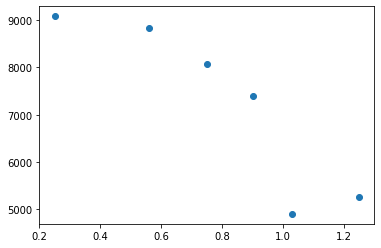

In [16]:
plt.scatter(distances, freq_peaks)


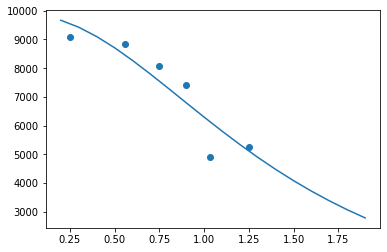

In [18]:
def theoreticalValue(x, a, b):
    f = a/(np.exp(np.pi*0.5*b*x)+np.exp(-np.pi*0.5*b*x))
    return f

beta,pconv = curve_fit(theoreticalValue,distances,freq_peaks)
beta[1] = np.abs(beta[1])
plt.scatter(distances,freq_peaks)
q = np.arange(0.2,2.0,0.1)
plt.plot(q,theoreticalValue(q, beta[0], beta[1]))
plt.show()


LEDすべて
周波数 1,3,5,7
地点 (1.75,1.0), (1.75,1.5), (1.75,2.0), (1.25,2.0), (1.25, 1.5), (1.25, 1.0)

(6, 3840, 2160)
(6, 2160)


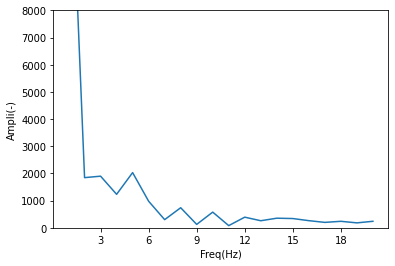

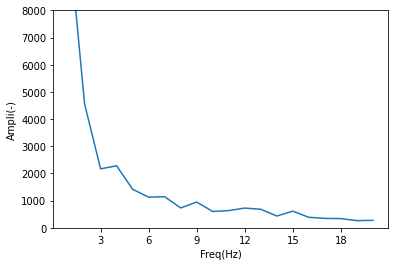

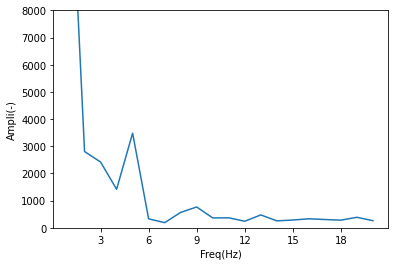

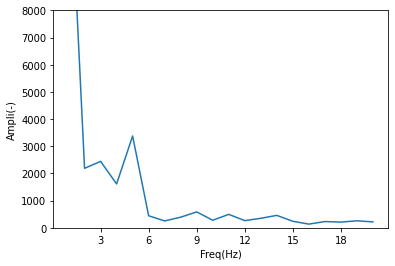

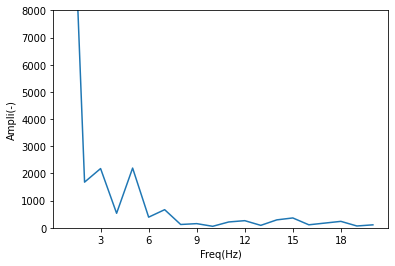

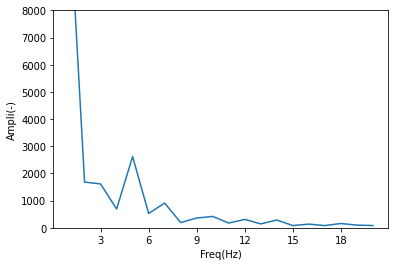

In [39]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/all/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,1920:2560,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
x = np.arange(1,21)
for specs in specs_all:
    specs = specs[1:21]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,8000])
    plt.show()

[[0.75, 0.9013878188659973, 1.25, 1.0307764064044151, 0.5590169943749475, 0.25], [0.25, 0.5590169943749475, 1.0307764064044151, 1.25, 0.9013878188659973, 0.75], [1.25, 0.9013878188659973, 0.75, 0.25, 0.5590169943749475, 1.0307764064044151], [1.0307764064044151, 0.5590169943749475, 0.25, 0.75, 0.9013878188659973, 1.25]]


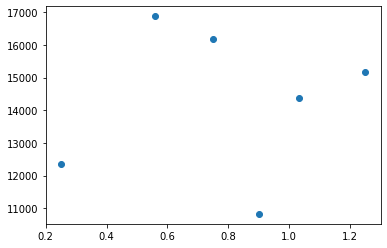

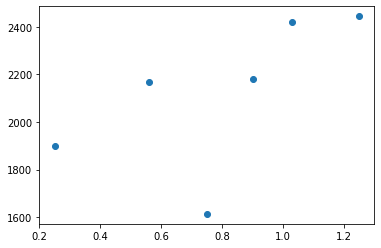

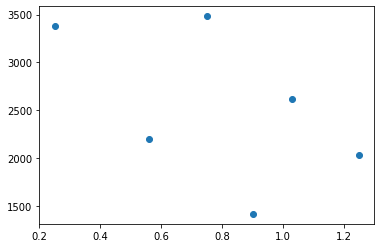

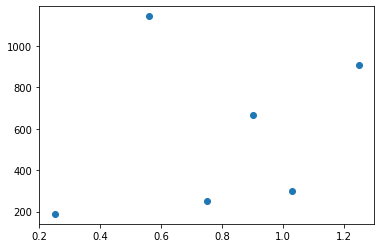

In [40]:
measure_positions = [
    [1.75, 1.0], [1.75, 1.5], [1.75, 2.0],
    [1.25, 2.0], [1.25, 1.5], [1.25, 1.0]
]
led_positions = [[1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [2.0, 2.0]]
distances = [[np.sqrt(np.square(measure[0] - led[0]) +
                      np.square(measure[1] - led[1])) for measure in measure_positions]
             for led in led_positions]
print(distances)

freq_peaks = specs_all[:, [1, 3, 5, 7]].T

for (distance, peak) in zip(distances, freq_peaks):
    plt.scatter(distance, peak)
    plt.show()


一個ずつ

(24, 3840, 2160)
(24, 2160)


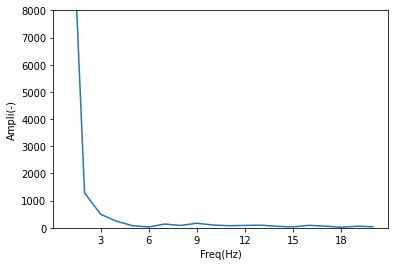

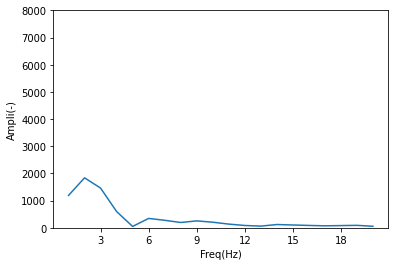

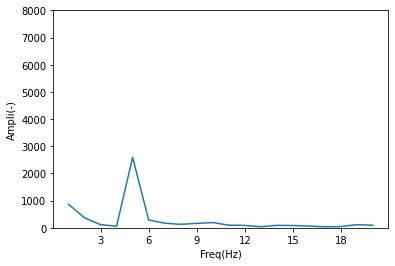

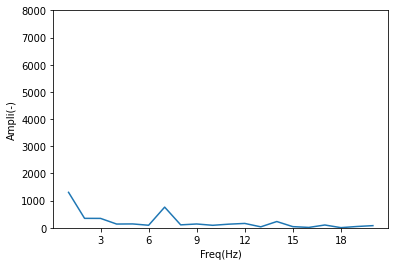

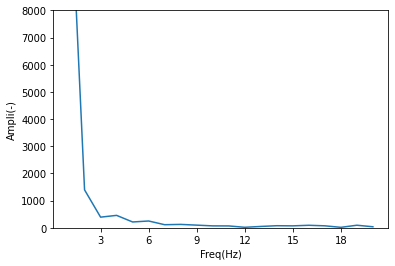

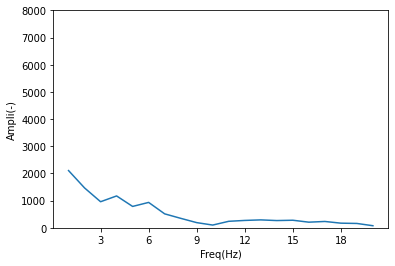

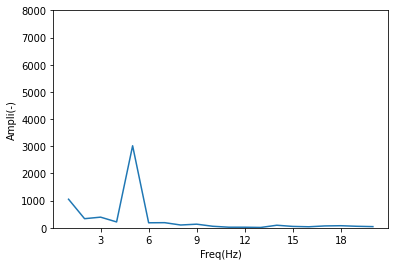

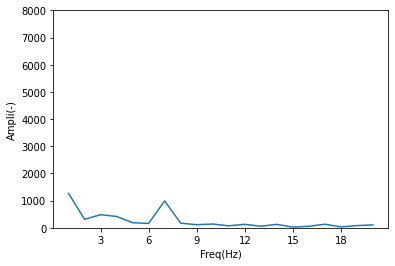

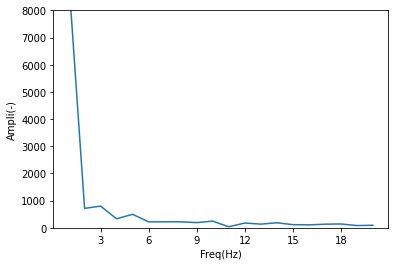

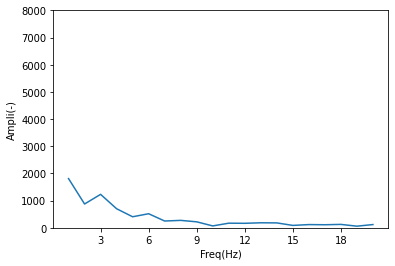

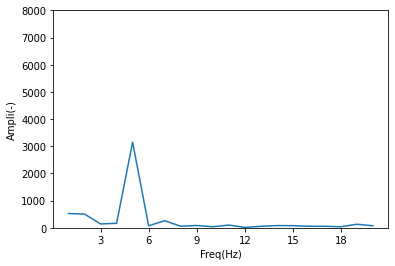

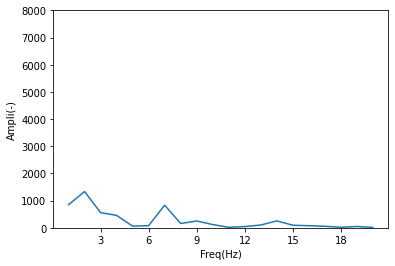

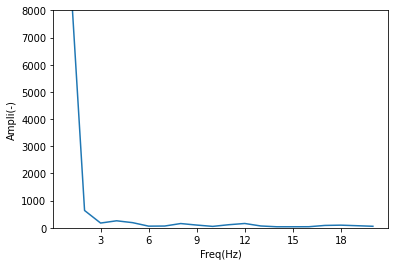

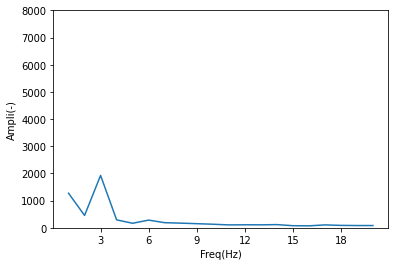

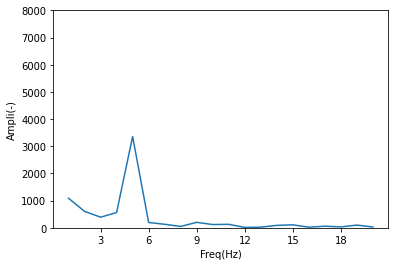

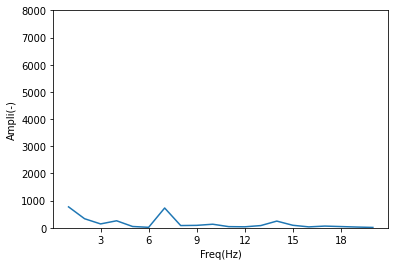

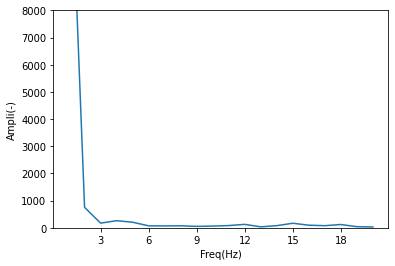

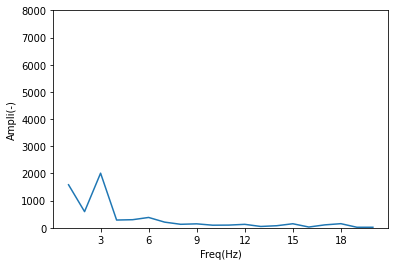

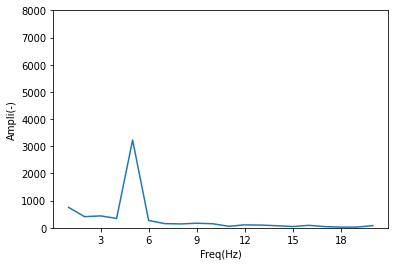

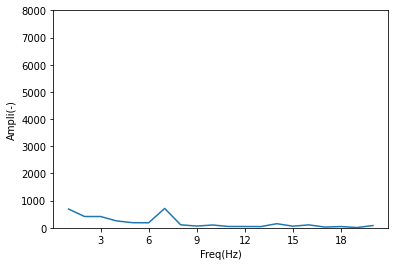

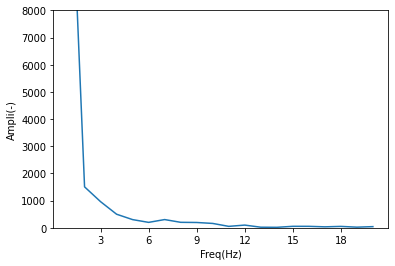

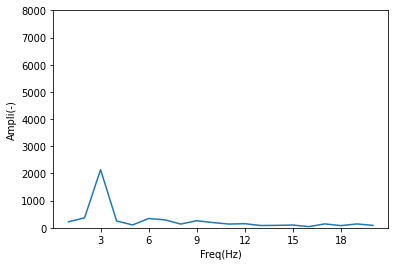

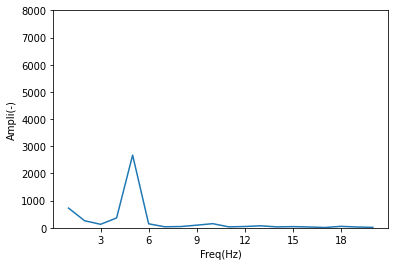

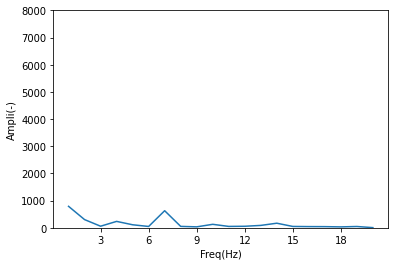

In [34]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/each/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,960:2880,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
specs_sum = np.array([np.sum(specs_all[i:i+4],axis=0) for i in range(6)])
x = np.arange(1,21)
for specs in specs_all:
    specs = specs[1:21]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,8000])
    plt.show()

[[0.75, 0.9013878188659973, 1.25, 1.0307764064044151, 0.5590169943749475, 0.25], [0.25, 0.5590169943749475, 1.0307764064044151, 1.25, 0.9013878188659973, 0.75], [1.25, 0.9013878188659973, 0.75, 0.25, 0.5590169943749475, 1.0307764064044151], [1.0307764064044151, 0.5590169943749475, 0.25, 0.75, 0.9013878188659973, 1.25]]


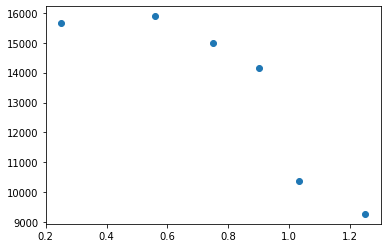

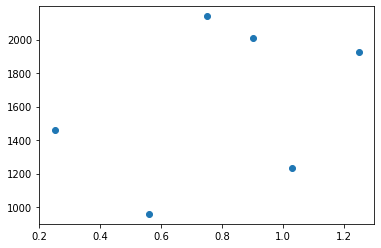

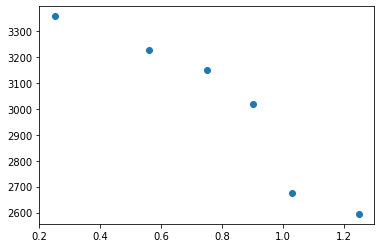

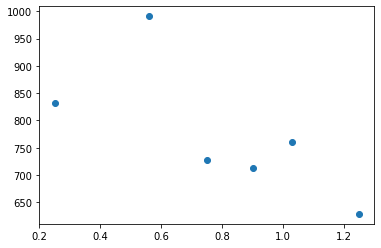

In [31]:
measure_positions = [
    [1.75, 1.0], [1.75, 1.5], [1.75, 2.0],
    [1.25, 2.0], [1.25, 1.5], [1.25, 1.0]
]
led_positions = [[1.0, 1.0], [2.0, 1.0], [1.0, 2.0], [2.0, 2.0]]
distances = [[np.sqrt(np.square(measure[0] - led[0]) +
                      np.square(measure[1] - led[1])) for measure in measure_positions]
             for led in led_positions]
print(distances)

# freq_peaks = specs_sum[:, [1, 3, 5, 7]].T
led1_freq = specs_all[0:24:4]
led2_freq = specs_all[1:24:4]
led3_freq = specs_all[2:24:4]
led4_freq = specs_all[3:24:4]
freq_peaks = [led1_freq[:, 1].T, led2_freq[:, 3].T,
              led3_freq[:, 5].T, led4_freq[:, 7].T]

for (distance, peak) in zip(distances, freq_peaks):
    plt.scatter(distance, peak)
    plt.show()


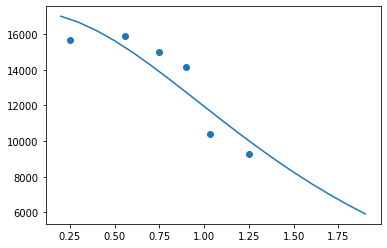

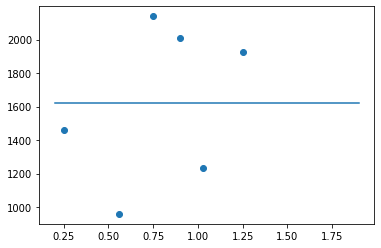

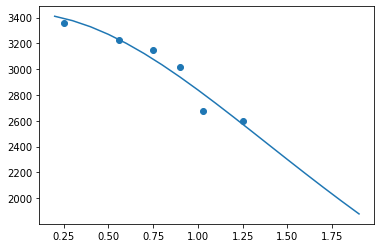

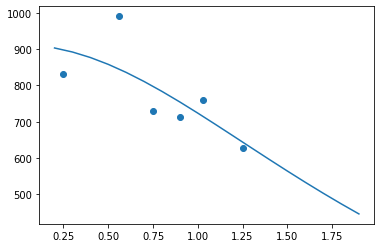

In [33]:
def theoreticalValue(x, a, b):
    f = a/(np.exp(np.pi*0.5*b*x)+np.exp(-np.pi*0.5*b*x))
    return f


for (distance, peak) in zip(distances, freq_peaks):
    beta, pconv = curve_fit(theoreticalValue, distance, peak)
    beta[1] = np.abs(beta[1])
    plt.scatter(distance, peak)
    q = np.arange(0.2, 2.0, 0.1)
    plt.plot(q, theoreticalValue(q, beta[0], beta[1]))
    plt.show()


(5, 1920, 1080)
(5, 1080)


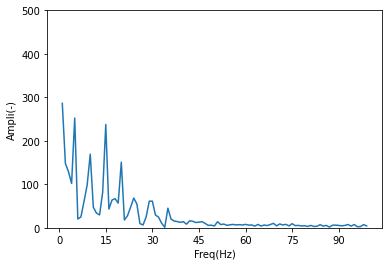

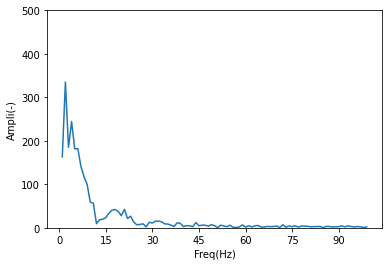

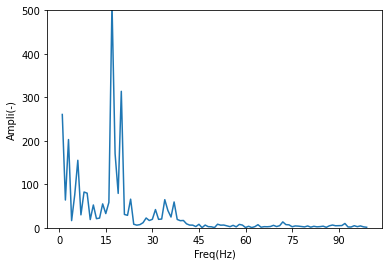

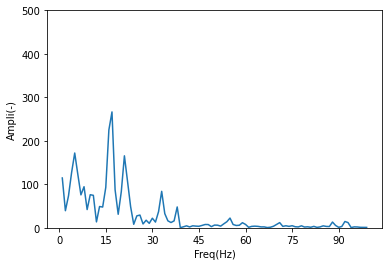

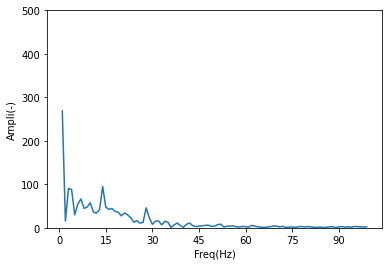

In [50]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/0.988/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,960:2880,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
# specs_sum = np.array([np.sum(specs_all[i:i+4],axis=0) for i in range(6)])
x = np.arange(1,100)
for specs in specs_all:
    specs = specs[1:100]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,500])
    plt.show()

(5, 1920, 1080)
(5, 1080)


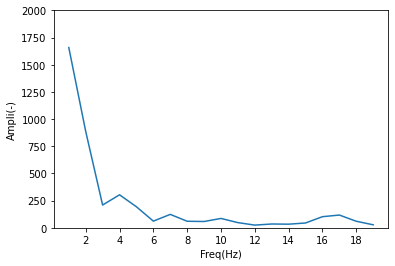

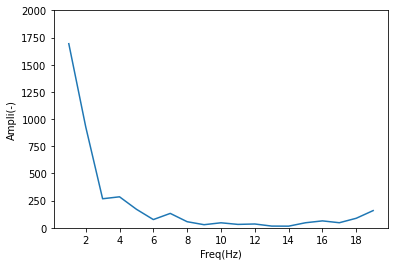

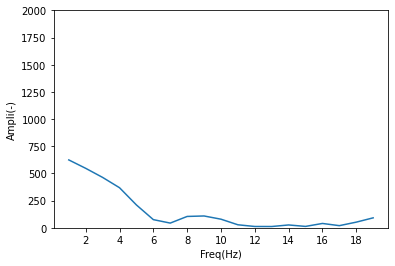

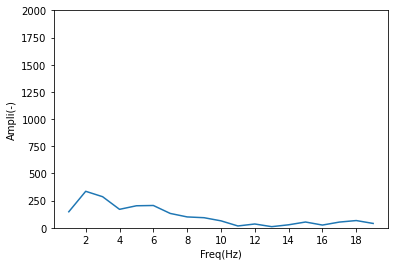

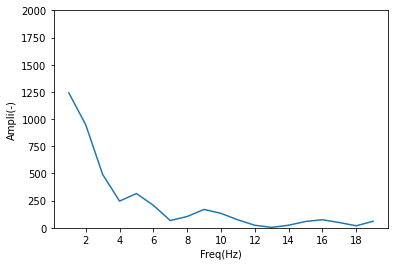

In [49]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/mix/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,960:2880,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
# specs_sum = np.array([np.sum(specs_all[i:i+4],axis=0) for i in range(6)])
x = np.arange(1,20)
for specs in specs_all:
    specs = specs[1:20]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,2000])
    plt.show()

(5, 1920, 1080)
(5, 1080)


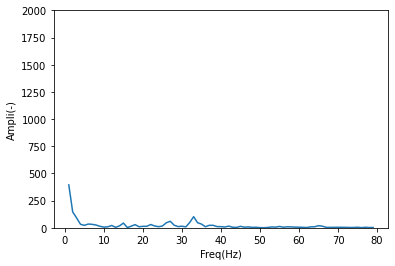

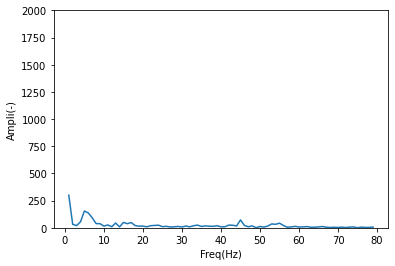

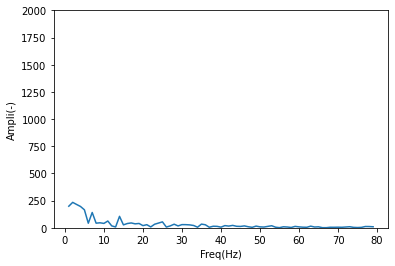

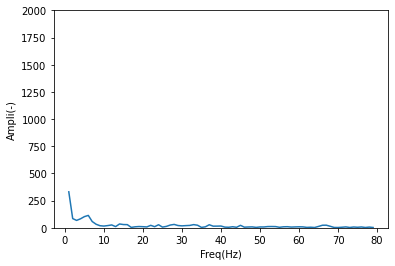

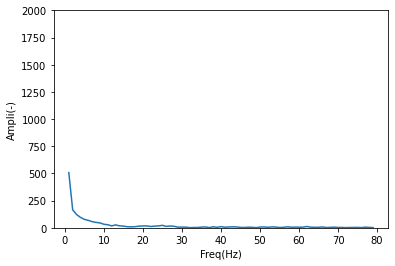

In [52]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/60/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,960:2880,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
# specs_sum = np.array([np.sum(specs_all[i:i+4],axis=0) for i in range(6)])
x = np.arange(1,80)
for specs in specs_all:
    specs = specs[1:80]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,2000])
    plt.show()

(5, 1920, 1080)
(5, 1080)


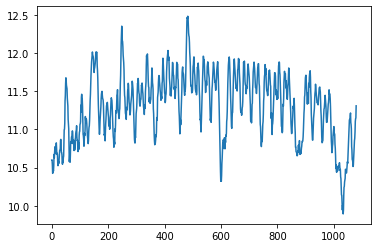

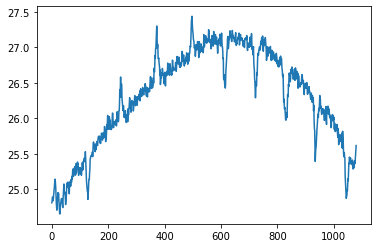

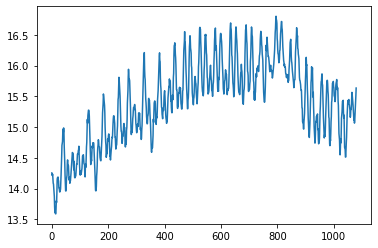

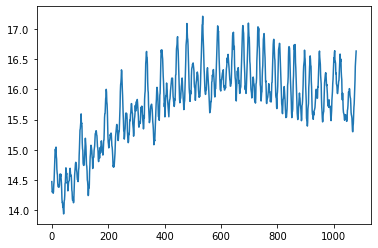

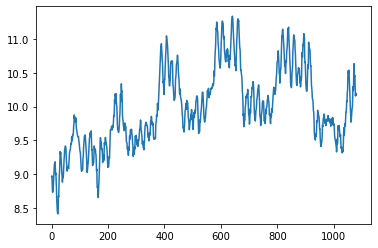

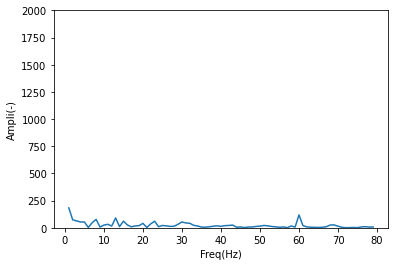

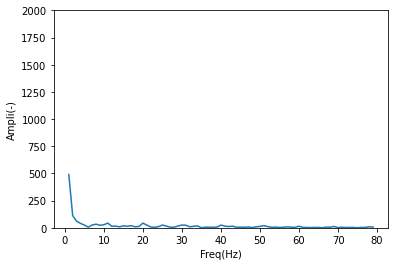

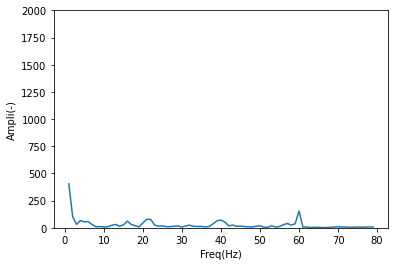

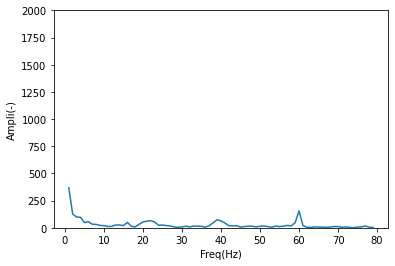

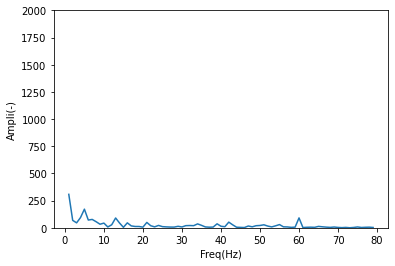

In [55]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/60-2/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,960:2880,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
# specs_sum = np.array([np.sum(specs_all[i:i+4],axis=0) for i in range(6)])
x = np.arange(1,80)
for avg in avg_rows:
    plt.plot(avg)
    plt.show()
for specs in specs_all:
    specs = specs[1:80]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,2000])
    plt.show()

(5, 1920, 1080)
(5, 1080)


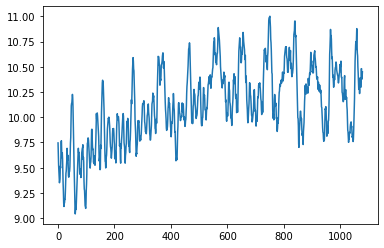

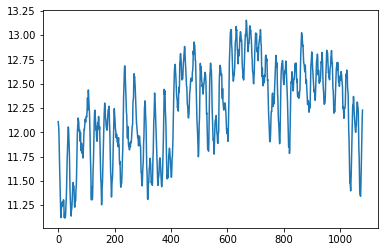

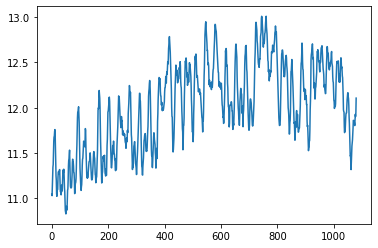

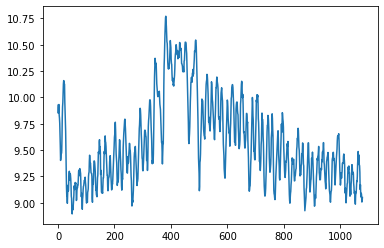

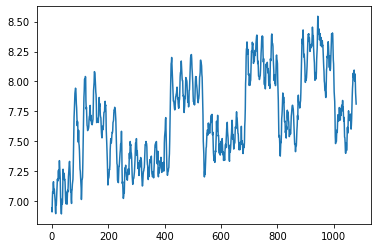

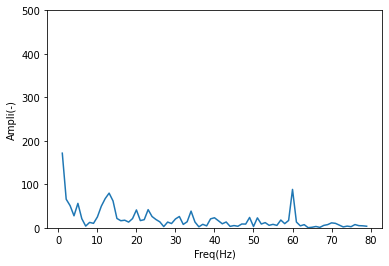

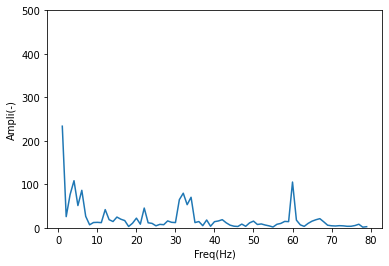

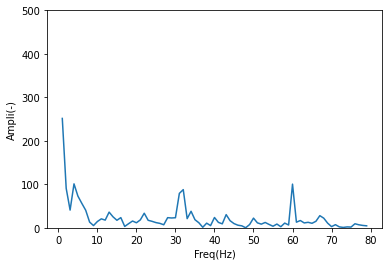

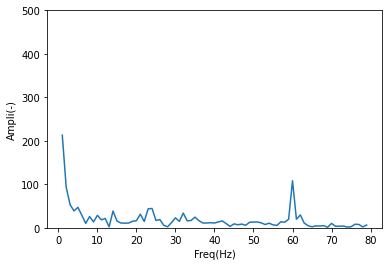

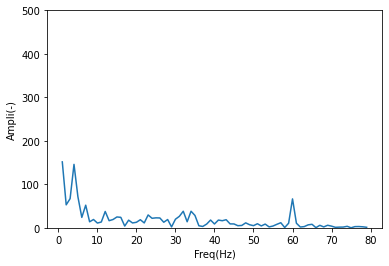

In [58]:
imgs = np.array([cv2.imread(path,cv2.IMREAD_GRAYSCALE) for path in glob.glob('img/2021-12-01/60-3/*.jpg')])
print(imgs.shape)
# imgs = imgs[:,960:2880,:]
avg_rows = np.mean(imgs,axis=1)
print(avg_rows.shape)
specs_all = np.array([np.abs(np.fft.rfft(rows)) for rows in avg_rows])
# specs_sum = np.array([np.sum(specs_all[i:i+4],axis=0) for i in range(6)])
x = np.arange(1,80)
for avg in avg_rows:
    plt.plot(avg)
    plt.show()
for specs in specs_all:
    specs = specs[1:80]
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot(x,specs)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Ampli(-)")
    plt.ylim([0,500])
    plt.show()